# Exercise 2

This notebook shows how we can perform linear regression on a dataset, this time using gradient descent.

We generate a noisy dataset (same as in a previous exercise):

In [1]:
import numpy as np

np.random.seed(0)
n_samples = 1000
X = np.random.rand(n_samples)*10
X = np.expand_dims(X, axis=-1)
noise = np.random.randn(n_samples)*4.0
noise = np.expand_dims(noise, axis=-1)
ground_truth = 5 * X + 3
y = ground_truth + noise

X and y are the features and the label, respectively. We can look at the format of the data:

In [2]:
print(type(X))
print(type(y))

print(X.shape)
print(y.shape)

print(X.dtype)
print(y.dtype)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(1000, 1)
(1000, 1)
float64
float64


As you can see, X and y are numpy arrays. We generated 1000 samples, with one feature per sample, and y are the corresponding labels for each sample.

## Plotting the data

When working with a dataset, it is always helpful to visualize the data that we are working with, in order to be able to check if our results are meaningful. We will use matplotlib to plot the data.

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

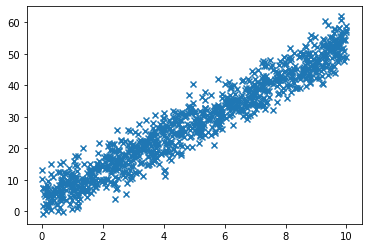

In [4]:
plt.figure()
plt.scatter(X, y, marker="x")
plt.show()

## Performing linear regression with backpropagation

Your tasks in this notebook are:
 - Add a column of ones to `X`, as we want to simplify the bias calculation
 - Generate a weight matrix with random values with the following code: `weights = (np.random.rand(num_features).reshape(-1, 1) * 2 - 1) / np.sqrt(num_features)`, where num_features is the number of columns in your extended X array.
 - Calculate the predictions as you did in the first exercise, with a matrix multiplication.
 - Calculate the loss based on the mean-squared-error.
 - Derive a formula for calculating the gradient for this example. Then, implement it using numpy. The result of the gradient should be `[[-309.6635798 ]
 [ -47.95719634]]`
 - Write a loop that performs loss calculation, gradient calculation and updating the weights via a defined learning rate for a given number of iterations (e.g. 100 or 1000). Does it converge? Try different learning rates.
 - If your solution converges, draw the regressed line along with the data points.

## Solution

Add the bias:

In [5]:
ones = np.ones(X.shape[0]) # create a vector of ones with the same length as the dataset
X_ = np.c_[X, ones] # concatenate the ones with the dataset

Regarding the gradients:

$$ L(x, w) = \sum {(y - X * w)}^2 $$
$$ \Rightarrow \frac{\partial L(x,w)}{\partial w} = \sum 2 {(y - X * w)} (- X)$$
$$ \Leftrightarrow \frac{\partial L(x,w)}{\partial w} -2 \sum X {(y - X*w)}$$

In [6]:
num_features = X_.shape[1]
weights = (np.random.rand(num_features).reshape(-1, 1) * 2 - 1) / np.sqrt(num_features)

learning_rate = 0.01

for epoch in range(100):
    pred = np.matmul(X_, weights)    
    diff = y - pred
    loss = np.sum(np.square(diff)) / X_.shape[0]
    grad = -2 * np.matmul(np.transpose(X_), diff) / X_.shape[0]
    weights -= learning_rate * grad
    print("Epoch %d \tLoss %f\tGrad %s" % (epoch, loss, str(grad[:,0])))
    

Epoch 0 	Loss 888.235620	Grad [-339.31193618  -52.40239545]
Epoch 1 	Loss 107.741724	Grad [-109.90671264  -17.69992834]
Epoch 2 	Loss 25.683708	Grad [-35.52791107  -6.44490865]
Epoch 3 	Loss 17.047512	Grad [-11.41283872  -2.79219925]
Epoch 4 	Loss 16.129743	Grad [-3.59461542 -1.60438076]
Epoch 5 	Loss 16.023458	Grad [-1.06026585 -1.21576371]
Epoch 6 	Loss 16.002576	Grad [-0.23908749 -1.0862867 ]
Epoch 7 	Loss 15.990768	Grad [ 0.02663735 -1.04084724]
Epoch 8 	Loss 15.980011	Grad [ 0.11227186 -1.0226723 ]
Epoch 9 	Loss 15.969458	Grad [ 0.13951883 -1.01335446]
Epoch 10 	Loss 15.959022	Grad [ 0.1478376  -1.00692545]
Epoch 11 	Loss 15.948690	Grad [ 0.1500219  -1.00145011]
Epoch 12 	Loss 15.938462	Grad [ 0.15021981 -0.99630093]
Epoch 13 	Loss 15.928335	Grad [ 0.14977623 -0.99127436]
Epoch 14 	Loss 15.918310	Grad [ 0.14912719 -0.98630432]
Epoch 15 	Loss 15.908384	Grad [ 0.14841407 -0.98136931]
Epoch 16 	Loss 15.898558	Grad [ 0.14768269 -0.97646227]
Epoch 17 	Loss 15.888829	Grad [ 0.14694788 -

The learning does converge, regression line:
$$\hat{y} = X * w$$

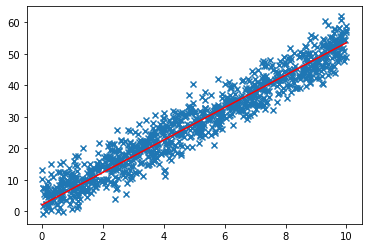

In [7]:
def regression_line(x):
    return x * weights[0, 0] + weights[1, 0]

plt.figure()
plt.scatter(X, y, marker="x")
plt.plot([np.min(X), np.max(X)], [regression_line(np.min(X)), regression_line(np.max(X))], 'r')
plt.show()